# To understand and implement OLAP operations on a multi-dimensional data cube.

In [1]:
import pandas as pd
df = pd.read_csv("sales_data_with_quarter.csv")



In [3]:
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      51290 non-null  object 
 1   state         51290 non-null  object 
 2   country       51290 non-null  object 
 3   region        51290 non-null  object 
 4   category      51290 non-null  object 
 5   sub_category  51290 non-null  object 
 6   product_name  51290 non-null  object 
 7   sales         48660 non-null  float64
 8   quantity      51290 non-null  int64  
 9   profit        51290 non-null  float64
 10  year          51290 non-null  int64  
 11  Quarter       51290 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 4.7+ MB


In [4]:
df.head()

,order_id,state,country,region,category,sub_category,product_name,sales,quantity,profit,year,Quarter
0,AG-2011-2040,Constantine,Algeria,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",408.0,2,106.140,2011,Q1
1,IN-2011-47883,New South Wales,Australia,Oceania,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.0,3,36.036,2011,Q1
2,HU-2011-1220,Budapest,Hungary,EMEA,Office Supplies,Storage,"Tenex Box, Single Width",66.0,4,29.640,2011,Q1
3,IT-2011-3647632,Stockholm,Sweden,North,Office Supplies,Paper,"Enermax Note Cards, Premium",45.0,3,-26.055,2011,Q1
4,IN-2011-47883,New South Wales,Australia,Oceania,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114.0,5,37.770,2011,Q1


# OLAP operations:
### 1. Roll-Up (Aggregate Sales by Year)

In [5]:
roll_up = df.groupby('year', as_index=False)['sales'].sum()
print("\nRoll-Up (Aggregate Sales by Year):")
print(roll_up)


Roll-Up (Aggregate Sales by Year):
   year      sales
0  2011  1378151.0
1  2012  1681499.0
2  2013  2107021.0
3  2014  2668457.0



#### 2. Drill-Down (Sales by Year and Quarter)

In [6]:
drill_down = df.groupby(['year', 'Quarter'], as_index=False)['sales'].sum()
print("\nDrill-Down (Sales by Year and Quarter):")
print(drill_down)


Drill-Down (Sales by Year and Quarter):
    year Quarter     sales
0   2011      Q1  204194.0
1   2011      Q2  314760.0
2   2011      Q3  361469.0
3   2011      Q4  497728.0
4   2012      Q1  247151.0
5   2012      Q2  409513.0
6   2012      Q3  446088.0
7   2012      Q4  578747.0
8   2013      Q1  320612.0
9   2013      Q2  503370.0
10  2013      Q3  618061.0
11  2013      Q4  664978.0
12  2014      Q1  420289.0
13  2014      Q2  597313.0
14  2014      Q3  741075.0
15  2014      Q4  909780.0


#### 3. Slice (Data for Year 2023)

In [27]:
slice_2023 = df[df['year'] == 2013]
print("\nSlice (Data for Year 2023):")
print(slice_2023.head(10).to_string(index=False)) 



Slice (Data for Year 2023):
       order_id           state        country     region        category sub_category                           product_name  sales  quantity  profit  year Quarter
  ID-2013-37383 New South Wales      Australia    oceania      Technology      Copiers            Canon Copy Machine, Digital    NaN         7  36.624  2013      Q1
  IN-2013-47960         Tianjin          China north asia       Furniture    Bookcases       Sauder Floating Shelf Set, Metal    NaN         7 203.700  2013      Q1
  ID-2013-37383 New South Wales      Australia    oceania      Technology  Accessories        Logitech Memory Card, Erganomic  729.0         8 -32.472  2013      Q1
  IN-2013-47960         Tianjin          China north asia       Furniture    Bookcases       Dania Library with Doors, Mobile    NaN         6 372.060  2013      Q1
  IN-2013-47960         Tianjin          China north asia       Furniture    Bookcases Sauder Floating Shelf Set, Traditional    NaN         7 340

#### 4. Dice (Sales for Year 2023 and Region 'North America')

In [23]:
from IPython.display import display
dice_2013 = df[(df['year'] == 2013) & (df['region'] == 'Africa')]
print("\nDice (Sales for Year 2013 and Region 'North America'):")
display(dice_df)  


Dice (Sales for Year 2013 and Region 'North America'):


,order_id,state,country,region,category,sub_category,product_name,sales,quantity,profit,year,Quarter
19967,ES-2013-5435815,England,United Kingdom,north,Office Supplies,Storage,"Fellowes Trays, Single Width",155.0,3,68.9040,2013,Q1
19979,CA-2013-6650,Ontario,Canada,canada,Office Supplies,Art,"Sanford Highlighters, Blue",16.0,1,1.7100,2013,Q1
19986,ES-2013-5114494,England,United Kingdom,north,Furniture,Bookcases,"Sauder Floating Shelf Set, Pine",NaN,8,360.4800,2013,Q1
19987,MX-2013-159583,Yucat n,Mexico,north,Technology,Copiers,"Brother Fax Machine, High-Speed",NaN,5,441.2884,2013,Q1
20000,ES-2013-5588129,England,United Kingdom,north,Office Supplies,Envelopes,"GlobeWeis Manila Envelope, Set of 50",164.0,6,54.1800,2013,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...
33648,MX-2013-104766,Zacatecas,Mexico,north,Office Supplies,Binders,"Acco Binder Covers, Recycled",18.0,2,1.6400,2013,Q4
33649,MX-2013-157448,Quertaro,Mexico,north,Office Supplies,Storage,"Eldon Trays, Wire Frame",63.0,2,12.5200,2013,Q4
33706,ES-2013-5731775,England,United Kingdom,north,Technology,Machines,"Panasonic Printer, Durable",800.0,3,167.9400,2013,Q4
33731,ES-2013-5731775,England,United Kingdom,north,Office Supplies,Fasteners,"Accos Paper Clips, Bulk Pack",71.0,5,26.1000,2013,Q4


###  Pivot (Rearranging the Cube for Better Analysis)

In [9]:
pivot_table = df.pivot_table(values='sales', index='category', columns='Quarter', aggfunc='sum')
print("\nPivot Table (Sales by Category and Quarter):")
print(pivot_table)



Pivot Table (Sales by Category and Quarter):
Quarter                Q1        Q2        Q3        Q4
category                                               
Furniture        354031.0  548205.0  656279.0  848090.0
Office Supplies  430506.0  661541.0  782860.0  915351.0
Technology       407709.0  615210.0  727554.0  887792.0


## Visualization

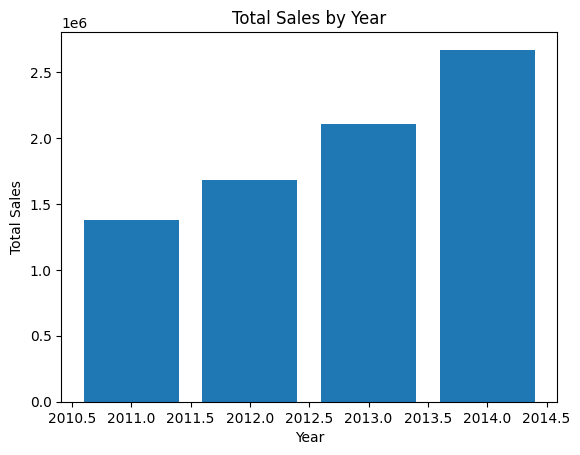

In [11]:
import matplotlib.pyplot as plt
plt.bar(roll_up['year'], roll_up['sales'])
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Total Sales by Year")
plt.show()

In [2]:
df.drop(['order_date', 'ship_date', 'ship_mode', 'customer_name', 
         'segment', 'market', 'product_id', 'discount', 
         'shipping_cost', 'order_priority'], axis=1, inplace=True)
